# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

#### Для чего фиксируются сиды?
Мы фиксируем сиды для воспроизводимости эксперимента. Если этого не сделать, каждый раз будут разные разбиения
на train/test, инициализация весов будет происходить с разной стартовой точки. Следовательно, объективно сравнить
модели не представляется возможным. Например, мы не сможем понять, вырасла ли метрика из-за удачно выбранного
гиперпараметра или из-за счастливой случайности. Фиксация сида исключает этот фактор случайности и позволяет
отслеживать изменения в результатах, появляющиеся в результате нашего влияния на модель.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
print('30 случайных строк тренировочного датасета:')
display(df_train.sample(30))

30 случайных строк тренировочного датасета:


name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [5]:
print('\nПервые 5 объектов тестового датасета:\n')
display(df_test.head())

print('\nПоследние 5 объектов тестового датасета:\n')
display(df_test.tail())


Первые 5 объектов тестового датасета:



name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0


Последние 5 объектов тестового датасета:



name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

#### Выводы на основе верхних, нижних и случаных строк

Анализируя верхние, нижние и случайные строки, можно поверхностно оценить качество данных, их пригодность для дальнейшего обучения
модели. Например, сразу же можно сказать, что столбцы `mileage`, `engine`, `max_power`, `torque` не готовы к использованию, так
как по факту являются числовыми, но загрязнены единицами измерения. Их требуется предварительно обработать.

Также, сравнивая между собой данные из начала и конца, при этом имея во внимание данные из случайных строк, можно проверить,
не упорядочены ли они. Другими словами, если бы в head были только старые машины, а в tail новые, а sample показывал равномерное смешение разных лет, можно было бы сделать вывод о том, что данные отсортированы.

При этом, анализируя эти данные, нельзя утверждать о полноте или уникальности данных. Даже если пропуски или дубликаты не попались в
выборке head, tail и sample, не факт, что их нет во всех объектах.

In [6]:
train_null_cols = df_train.isna().sum()
print('\nКолонки с пропущенными значениями в тренировочных данных:')
print(train_null_cols[train_null_cols > 0])

test_null_cols = df_test.isna().sum()
print('\nКолонки с пропущенными значениями в тестовых данных:')
print(test_null_cols[test_null_cols > 0])

train_duplicates = df_train.duplicated().sum()
test_duplicates = df_test.duplicated().sum()
print(f'\nКоличество дубликатов в тренировочных данных: {train_duplicates}')
print(f'Количество дубликатов в тестовых данных: {test_duplicates}')


Колонки с пропущенными значениями в тренировочных данных:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

Колонки с пропущенными значениями в тестовых данных:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

Количество дубликатов в тренировочных данных: 985
Количество дубликатов в тестовых данных: 62


#### Достаточно ли метода duplicated для анализа дубликатов?

Нет, метода duplicated не достаточно для анализа дубликатов. В датасете могут быть объекты с одинаковым признаковым описанием,
но разным таргетом. Например, владелец машины выставил объявление о её продаже, но потом решил поднять или снизить ее стоимость и выставил
еще одно объявление. Объект всё тот же, но изменился таргет.

Также, в датасете могут быть скрытые дубли, возникающие по той причине, что одни и те же данные вводятся в различных вариациях. Например, строки могут быть написаны в разных регистрах. В таком случае нужно сначала привести их к нижнему регистру. Проблемой могут быть лишние пробелы в данных, их можно удалить с помощью метода strip(). Также бывает, что числовые признаки округлены по-разному. То есть, одно число может быть округлено до одной запятой, а другое до двух, тогда их нужно округлить до одинаковой точности.

In [7]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(df_train, title="Car Price EDA")
profile_report.to_file('CarPrice_report.html')

profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/13 [00:00<?, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 48.10it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Базовые выводы

На основе построенных дашбордов и первичного осмотра данных можно сделать следующие выводы:

#### В данных имеются пропуски и дубликаты
В датасете обнаружено некоторое количество пропусков в столбцах `mileage`, `engine`, `max_power`, `torque` и `seats`, а также 985 дубликатов (хотя дашборд показывает 493, это, вероятно, связано с тем, что Pandas считает строки дубликатами даже в тех случаях, когда в одной из них пропущено какое-либо значение). Дубликаты нужно удалить, а пропуски заполнить.

#### Имеется проблема с типами данных
Некоторые из признаков имеют тип данных `object`, хотя по сути таковыми не являются. Это числовые признаки, типа данных которых отобразился
некорректно из-за наличия единиц измерения. Такая проблема наблюдается у признаков `mileage` и `engine`. Для дальнейшей работы с ними
необходимо удалить единицы измерения и привести их к числовому типу. Столбец `max_power` имеет тип данныъ `object`, но при этом содержит 
только численные данные. Его необходимо привести к типу `float`.

#### Некорректность признака torque
Признак `torque` несёт в себе сразу две величины: момент и обороты. Для работы с этим признаком его необходимо распарсить на два новых признака.

#### Анализ корреляций
Можно отметить, что признак `max_power` сильно коррелирует с несколькими признаками и имеет сильную связь с `selling_price`. Также
с `selling_price` достаточно сильно коррелируют `year` и `km_driven`.

In [8]:
print('\nОсновные статистики по числовым столбцам для трейна:\n')
display(df_train.describe())
print('\nОсновные статистики по числовым столбцам для теста:\n')
display(df_test.describe())

print('\nОсновные статистики по категориальным столбцам для трейна:\n')
display(df_train.describe(include=[object]))
print('\nОсновные статистики по категориальным столбцам для теста:\n')
display(df_test.describe(include=[object]))


Основные статистики по числовым столбцам для трейна:



year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


Основные статистики по числовым столбцам для теста:



year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000


Основные статистики по категориальным столбцам для трейна:



name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468


Основные статистики по категориальным столбцам для теста:



name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

## Выводы по статистикам

#### Сравнение среднего и медианы
В признаке `selling_price` среднее значение существенно больше медианного. Это может быть связано с тем, что в данных присутствуют
машины, цена которых очень сильно превышает типичную стоимость машин. Это видно, если сравнить медианное значение (450000 в трейне)
с максимальным (10000000 в трейне). Возможно, эти данные являются выбросами, нужны дополнительные исследования. Также, среднее значение признаков `km_driven` и `seats` тоже больше медианного, но не столь существенно.

#### Однородность данных
В целом, можно сказать, что разбиение данных на трейн и тест прошло успешно и выборка является вполне репрезентативной. Основные
статистики обучающей и тестовой выборки очень близки.

#### Уникальные значения
Признак `name` в тренировочных данных содержит треть уникальных значений от общего количества, а в тестовых и вовсе более половины.
Это приведет к переобучению, так как модель запомнит конкретные названия, которые могут не встретиться в дальнейшем.
Такие данные непригодны для прямого использования.

`max_power` не является категориальным признаком, его необходимо преобразовать в числовой.

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
# Очищаем данные от лишних символов, оставляя только числа
df_train['max_power'] = df_train['max_power'].astype('str').str.replace(' bhp', '')
df_test['max_power'] = df_test['max_power'].astype('str').str.replace(' bhp', '')
df_train['mileage'] = df_train['mileage'].astype('str').str.replace(' kmpl', '').str.replace(' km/kg', '')
df_test['mileage'] = df_test['mileage'].astype('str').str.replace(' kmpl', '').str.replace(' km/kg', '')
df_train['engine'] = df_train['engine'].astype('str').str.replace(' CC', '')
df_test['engine'] = df_test['engine'].astype('str').str.replace(' CC', '')

# Приводим нужные столбцы к чиловому типу, если возникает ошибка - вставляем на это место NaN
df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce')
df_test['mileage'] = pd.to_numeric(df_test['mileage'], errors='coerce')
df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')
df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')

# Решил предобработать torque
def split_torque(x):
    if pd.isna(x) or x in [np.nan, 'nan']:
        return np.nan, np.nan

    x = x.lower().strip()
    torq = ''
    
    # Проходим по строке. Если встречается численный символ - записываем его, иначе - выходим из цикла
    # В результате получим первое встретившееся число, которое является моментом.
    for c in x:
        if c.isdigit() or c == '.':
            torq += c
        elif c:
            break

    try:
        torq = float(torq)
    except:
        torq = np.nan

    # Конвертация kgm в Nm
    if 'kgm' in x:
        torq *= 9.8

    rpm = np.nan

    # Извлечение rpm
    if '@' in x:
        rpm_data = x.split('@')[1]
    elif 'at' in x:
        rpm_data = x.split('at')[1]
    else:
        rpm_data = ''

    # Извлечение численного значения rpm
    if rpm_data:
        rpm_data = rpm_data.replace('rpm', '').replace(',', '').strip()
        # Если указан диапазан оборотов, то берём их среднее значение
        if '-' in rpm_data:
            try:
                l, r = rpm_data.split('-')
                rpm = (float(l) + float(r)) / 2
            except:
                pass
        else:
            rpm = ''
            # Получаем число оборотов по аналогии с моментом
            for c in rpm_data:
                if c.isdigit() or c == '.':
                    rpm += c
                elif rpm and c != '.':
                    break
            try:
                rpm = float(rpm)
            except:
                pass
                
    # В данных встречаются и другие формы записи момента и оборотов, но решил их не рассматривать, заменив на Nan,
    # так как их не очень много и они вариативны. Их очищение не должно сказаться на дальнейших результатах.
    return torq, rpm

df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(split_torque(x)))
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(split_torque(x)))

display(df_train.head())
display(df_test.head())

display(df_train.info())

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00  190.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52  250.00   
2  Individual       Manual   First Owner    23.00  1396.0      90.00  219.52   
3  Individual       Manual   First Owner    16.10  1298.0      88.20  112.70   
4  Individual       Manual   First Owner    20.14  1197.0      81.86  113.75   

   seats  max_torque_rpm  
0    5.0          2000.0  
1    5.0          2000.0  
2    5.0          2250.0  
3    5.0          4500.0  
4    5.0          4000.0

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2000.0  
1   260.0    5.0          2125.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0          3000.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            6999 non-null   object 
 1   year            6999 non-null   int64  
 2   selling_price   6999 non-null   int64  
 3   km_driven       6999 non-null   int64  
 4   fuel            6999 non-null   object 
 5   seller_type     6999 non-null   object 
 6   transmission    6999 non-null   object 
 7   owner           6999 non-null   object 
 8   mileage         6797 non-null   float64
 9   engine          6797 non-null   float64
 10  max_power       6802 non-null   float64
 11  torque          6796 non-null   float64
 12  seats           6797 non-null   float64
 13  max_torque_rpm  6642 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 765.6+ KB


None

In [10]:
cols_to_fill = ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']
df_train[cols_to_fill] = df_train[cols_to_fill].fillna(df_train[cols_to_fill].median())
df_test[cols_to_fill] = df_test[cols_to_fill].fillna(df_train[cols_to_fill].median())

####  Обоснование выбора медианы в качестве заполнителя пропусков
Для заполнения пропусков мы используем медиану, так как, как уже говорилось в выводах ранее, в наших данных есть признаки, по которым 
среднее значение достаточно сильно отличается от медианного. Это говорит о том, что присуствуют объекты с очень нетипичными значениями по
этим признакам. Эти данные могут быть выбросами, а медиана к ним более устойчива, чем среднее значение.

#### Медиана для заполнения считается по данным для `train`
Медиану считаем по трейну, иначе модель может "заглянуть в будущее" и косвенно обучиться на тестовых данных, что называется data leakage.

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
X_cols = df_train.columns.drop('selling_price')

duplicates_sub = df_train.duplicated(subset=X_cols, keep=False)
print(f'Количество объектов с одинаковым признаковым описанием: {duplicates_sub.sum()}')
display(df_train[duplicates_sub])
X_duplicates_sub = df_train.duplicated(subset=X_cols)
print(f'Количество объектов с одинаковым признаковым описанием, не включая первое появление: {X_duplicates_sub.sum()}')
df_train = df_train.drop_duplicates(subset=X_cols)
df_train = df_train.reset_index(drop=True)

Количество объектов с одинаковым признаковым описанием: 1799


name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
22        45000  Petrol  Individual       Manual   First Owner    21.40   
26        25000  Petrol  Individual       Manual   First Owner    16.80   
27        70000  Diesel  Individual       Manual   First Owner    24.30   
28        50000  Petrol  Individual       Manual  Second Owner    19.30   
29        35000  Petrol  Individual       Manual  Second Owner    14.00   
...         ...     ...         ...          ...           ...      ...   
6981      24000  Diesel  Individual       Manual   First Owner    24.40   
6984      24000  Diesel  Individual       Manual   First Owner    24.40   
6989      50000  Diesel  Individual       Manual   First Owner    26.59   
6997      25000  Diesel  Individual       Manual   First Owner    23.57   
6998      25000  Diesel  Individual       Manual   First Owner    23.57   

      engine  max_power  torque  seats  max_torque_rpm  
22    1197.0      83.10  115.00    5.0          4000.0  
26     796.0      34.20   59.00    8.0          2500.0  
27    1248.0      88.50  200.00    5.0          1750.0  
28    1248.0      82.00  170.00    5.0          2500.0  
29     796.0      35.00   59.78    5.0          3000.0  
...      ...        ...     ...    ...             ...  
6981  1498.0      98.63  215.00    5.0          2375.0  
6984  1498.0      98.63  215.00    5.0          2375.0  
6989  1248.0      74.00  190.00    5.0          2000.0  
6997  1396.0      70.00  140.00    5.0          2400.0  
6998  1396.0      70.00  140.00    5.0          2400.0  

[1799 rows x 14 columns]

Количество объектов с одинаковым признаковым описанием, не включая первое появление: 1159


In [12]:
# Вместо удаления признака torque, предобработал его, поэтому столбцов стало 14
assert df_train.shape == (5840, 14)
df_train.tail()

name  year  selling_price  km_driven  \
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
5835  Petrol  Individual       Manual           First Owner    17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.90   998.0   
5837  Petrol  Individual       Manual           First Owner    18.50  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.80  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.30  1248.0   

      max_power  torque  seats  max_torque_rpm  
5835      62.10    96.1    5.0          3000.0  
5836      67.10    90.0    5.0          3500.0  
5837      82.85   113.7    5.0          4000.0  
5838     110.00   235.2    5.0          2500.0  
5839      73.90   190.0    5.0          2000.0

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [13]:
# Уже выполнил эти шаги выше.
# Вместо удаления torque, предобработал его, разделив на `torque` и `max_torque_rpm`.

print('Типы данных для признаков в тренировочном датасете:')
display(df_train.dtypes)
print()
print('Типы данных для признаков в тестовом датасете:')
display(df_test.dtypes)

Типы данных для признаков в тренировочном датасете:


name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
dtype: object


Типы данных для признаков в тестовом датасете:


name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [14]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype('int')
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype('int')

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [15]:
# Рассматривал стастистики до заполнения пропусков, там есть некоторые выводы. Здесь дополняю.

In [16]:
print('\nОсновные статистики по числовым столбцам для трейна:\n')
display(df_train.describe())
print('\nОсновные статистики по числовым столбцам для теста:\n')
display(df_test.describe())

print('\nОсновные статистики по категориальным столбцам для трейна:\n')
display(df_train.describe(include=[object]))
print('\nОсновные статистики по категориальным столбцам для теста:\n')
display(df_test.describe(include=[object]))


Основные статистики по числовым столбцам для трейна:



year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.910782   176.239885     5.426712     2852.194435  
std      31.639585   116.683907     0.982344      969.856185  
min       0.000000    47.040000     2.000000     1300.000000  
25%      68.000000   111.800000     5.000000     2000.000000  
50%      81.860000   170.000000     5.000000     2500.000000  
75%      99.000000   200.000000     5.000000     3750.000000  
max     400.000000  3724.000000    14.000000    21800.000000


Основные статистики по числовым столбцам для теста:



year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.844330   177.798530     5.403000     2897.251000  
std      34.892709   103.688463     0.912921      951.486416  
min      34.200000    48.000000     4.000000     1470.000000  
25%      69.000000   111.700000     5.000000     2125.000000  
50%      82.425000   170.000000     5.000000     2500.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1421.000000     9.000000     5000.000000


Основные статистики по категориальным столбцам для трейна:



name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603


Основные статистики по категориальным столбцам для теста:



name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

#### Сравнение статистик
Заполнение пропусков не сдвинуло наши распределения. Это хорошо видно на примере признака seats, которой до и после заполнения пропусков
представлен как числовой столбец. Заполнение пропусков действительно могло бы сильно повлиять на распределение, если бы их было больше.
В нашем же случае их доля от общего количества данных составляла всего 2-3%, что является незначительным. Однако, стоит отметить, что
значительные изменения других признаков вызваны удалением дубликатов на предыдущих шагах

In [17]:
# Вместо удаления признака torque, предобработал его, поэтому столбцов стало 14
assert df_train.shape == (5840, 14)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

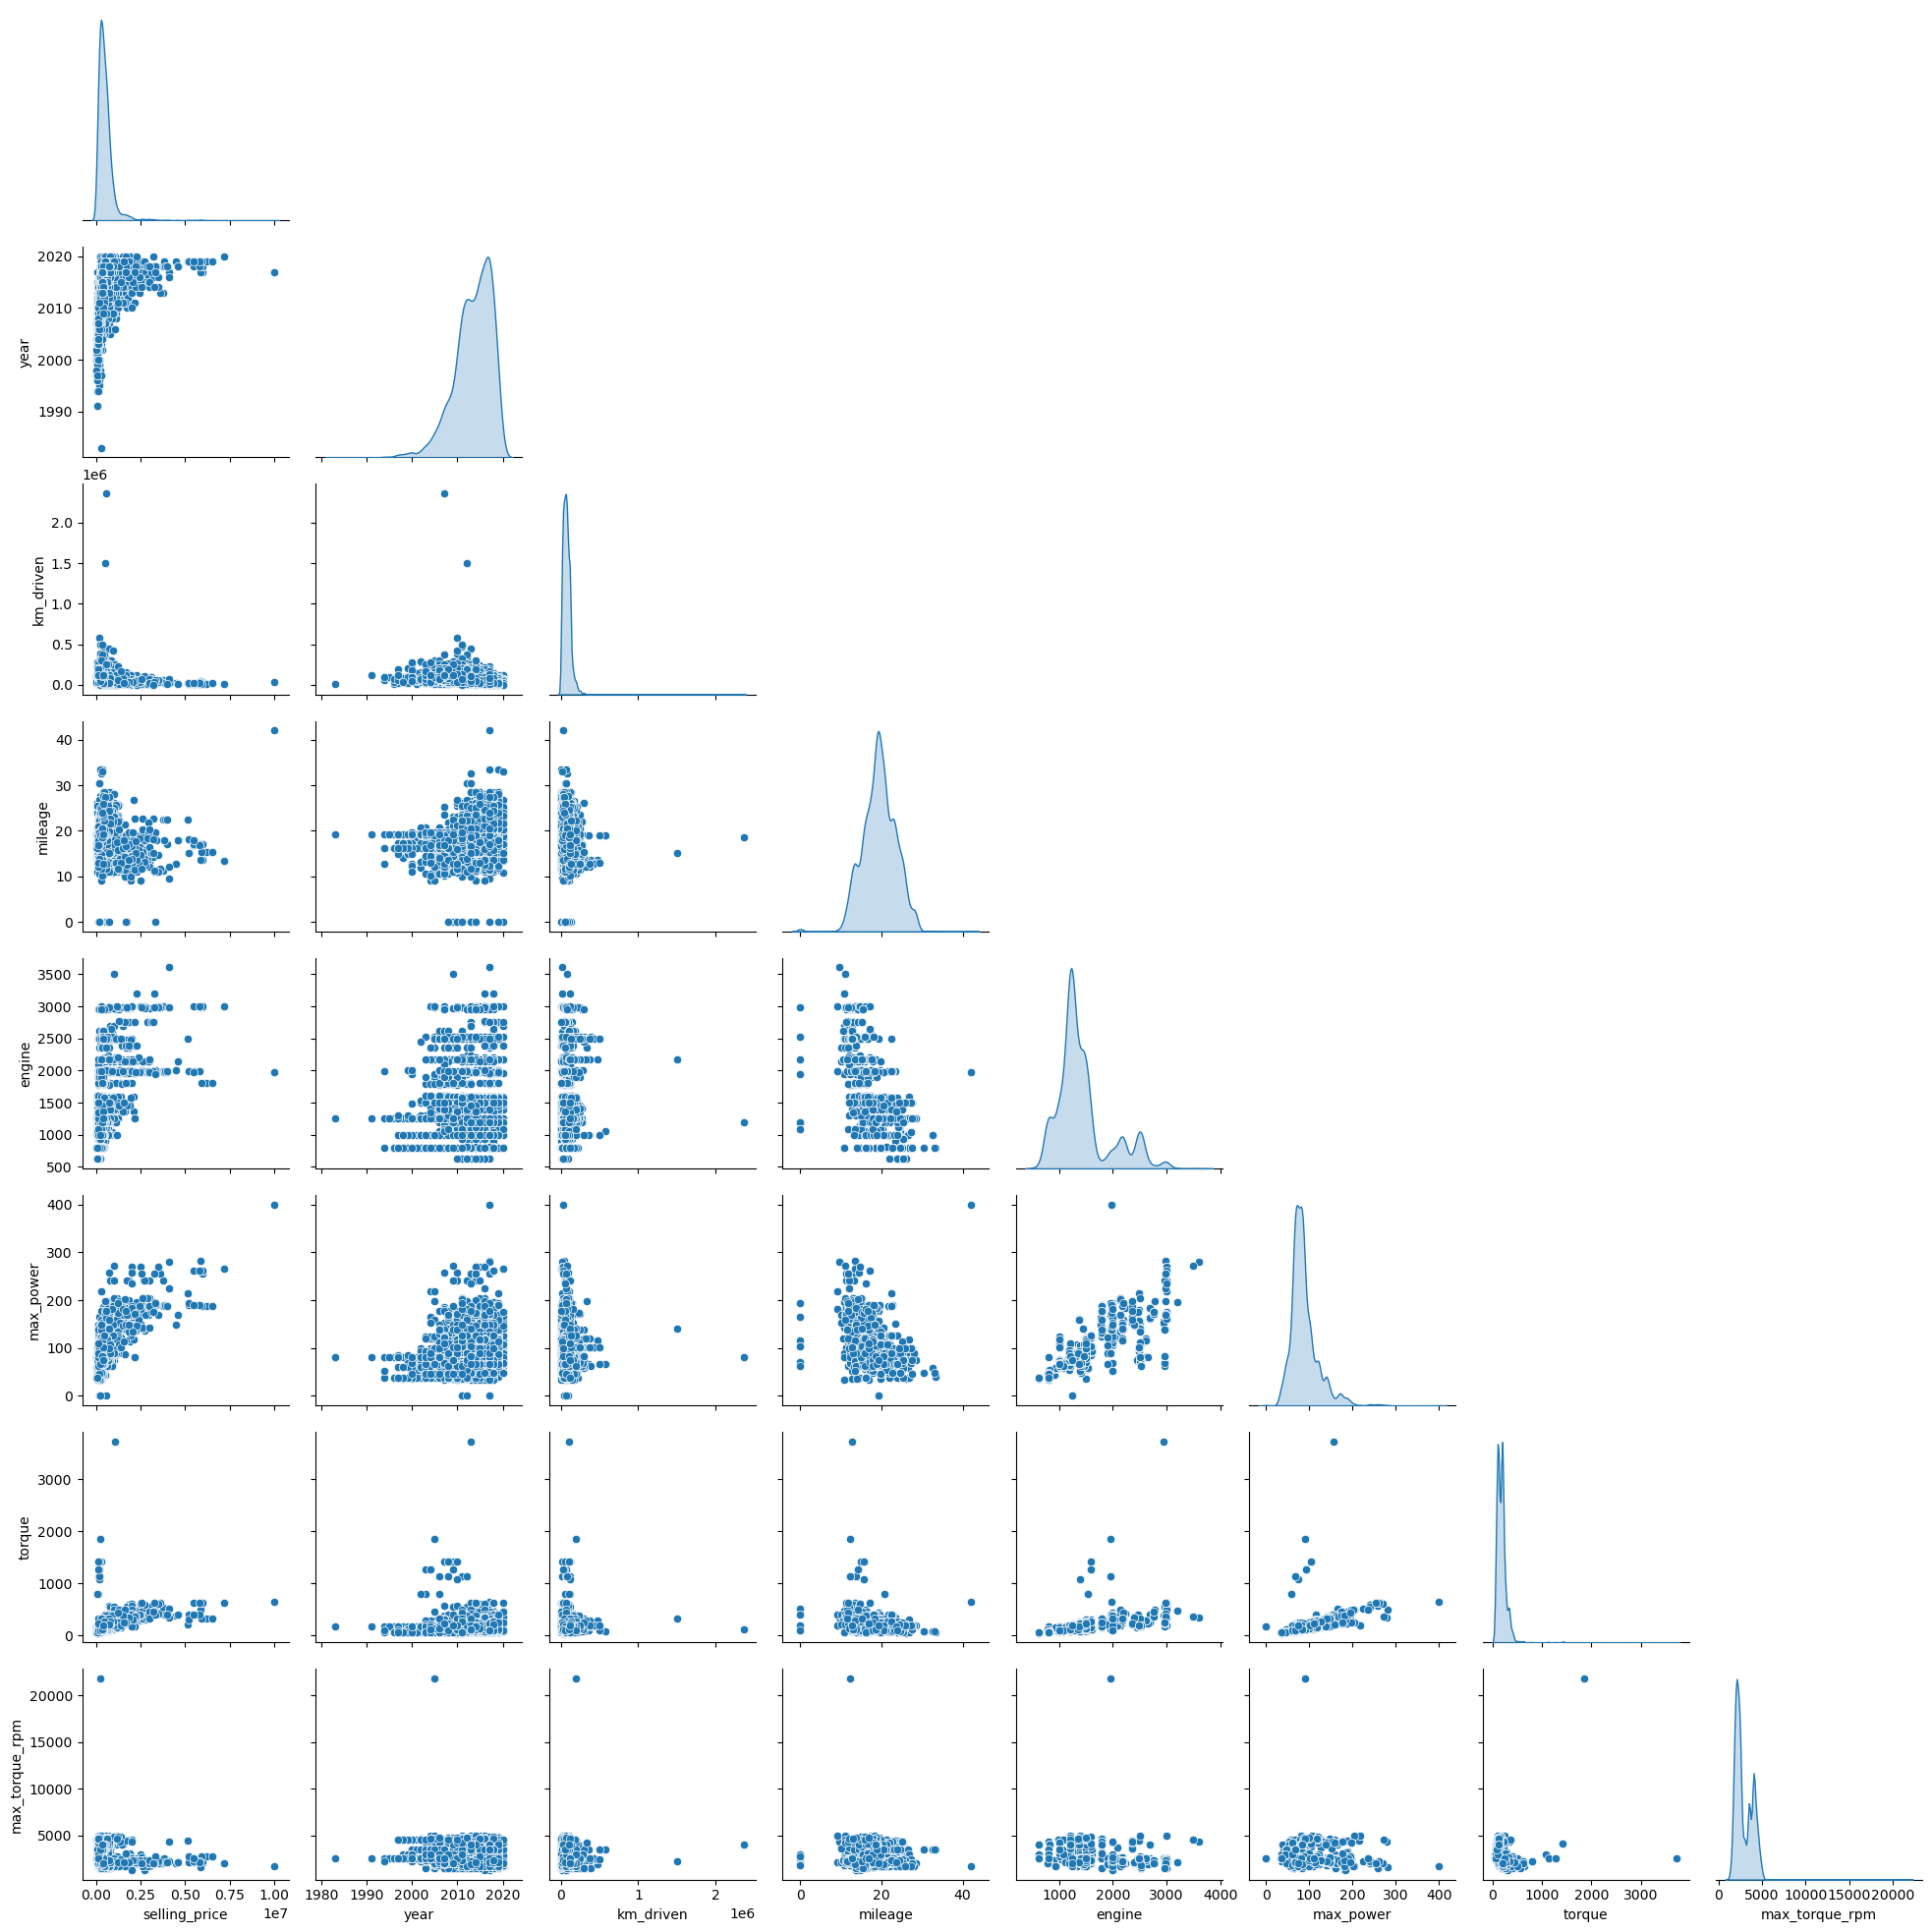

In [18]:
%matplotlib inline

numerical_cols = ['selling_price', 'year', 'km_driven', 'mileage', 
                  'engine', 'max_power', 'torque', 'max_torque_rpm']

sns.pairplot(df_train[numerical_cols],
             corner=True,
             diag_kind='kde',
             height=2.5
            )
plt.show()

#### Можно ли предположить на основе распределений связь признаков с целевой переменной?
Да, связь признаков с целевой переменных можно предположить на основе распределений. Так, например, можно заметить связь
между целевой переменно и `max_power`. Чем больше стоимость, тем в среднем выше мощность автомобиля. Аналогично с
`year` и `engine`.

#### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
Да, на основе распределений можно выдвинуть гипотезу о корреляциях признаков. Несложно заметить положительную корреляцию
между `max_power` и `engine`, между `torque` и `engine` с `max_power`. Исходя из этого, можно сделать вывод о
проблеме мультиколлинеарности.


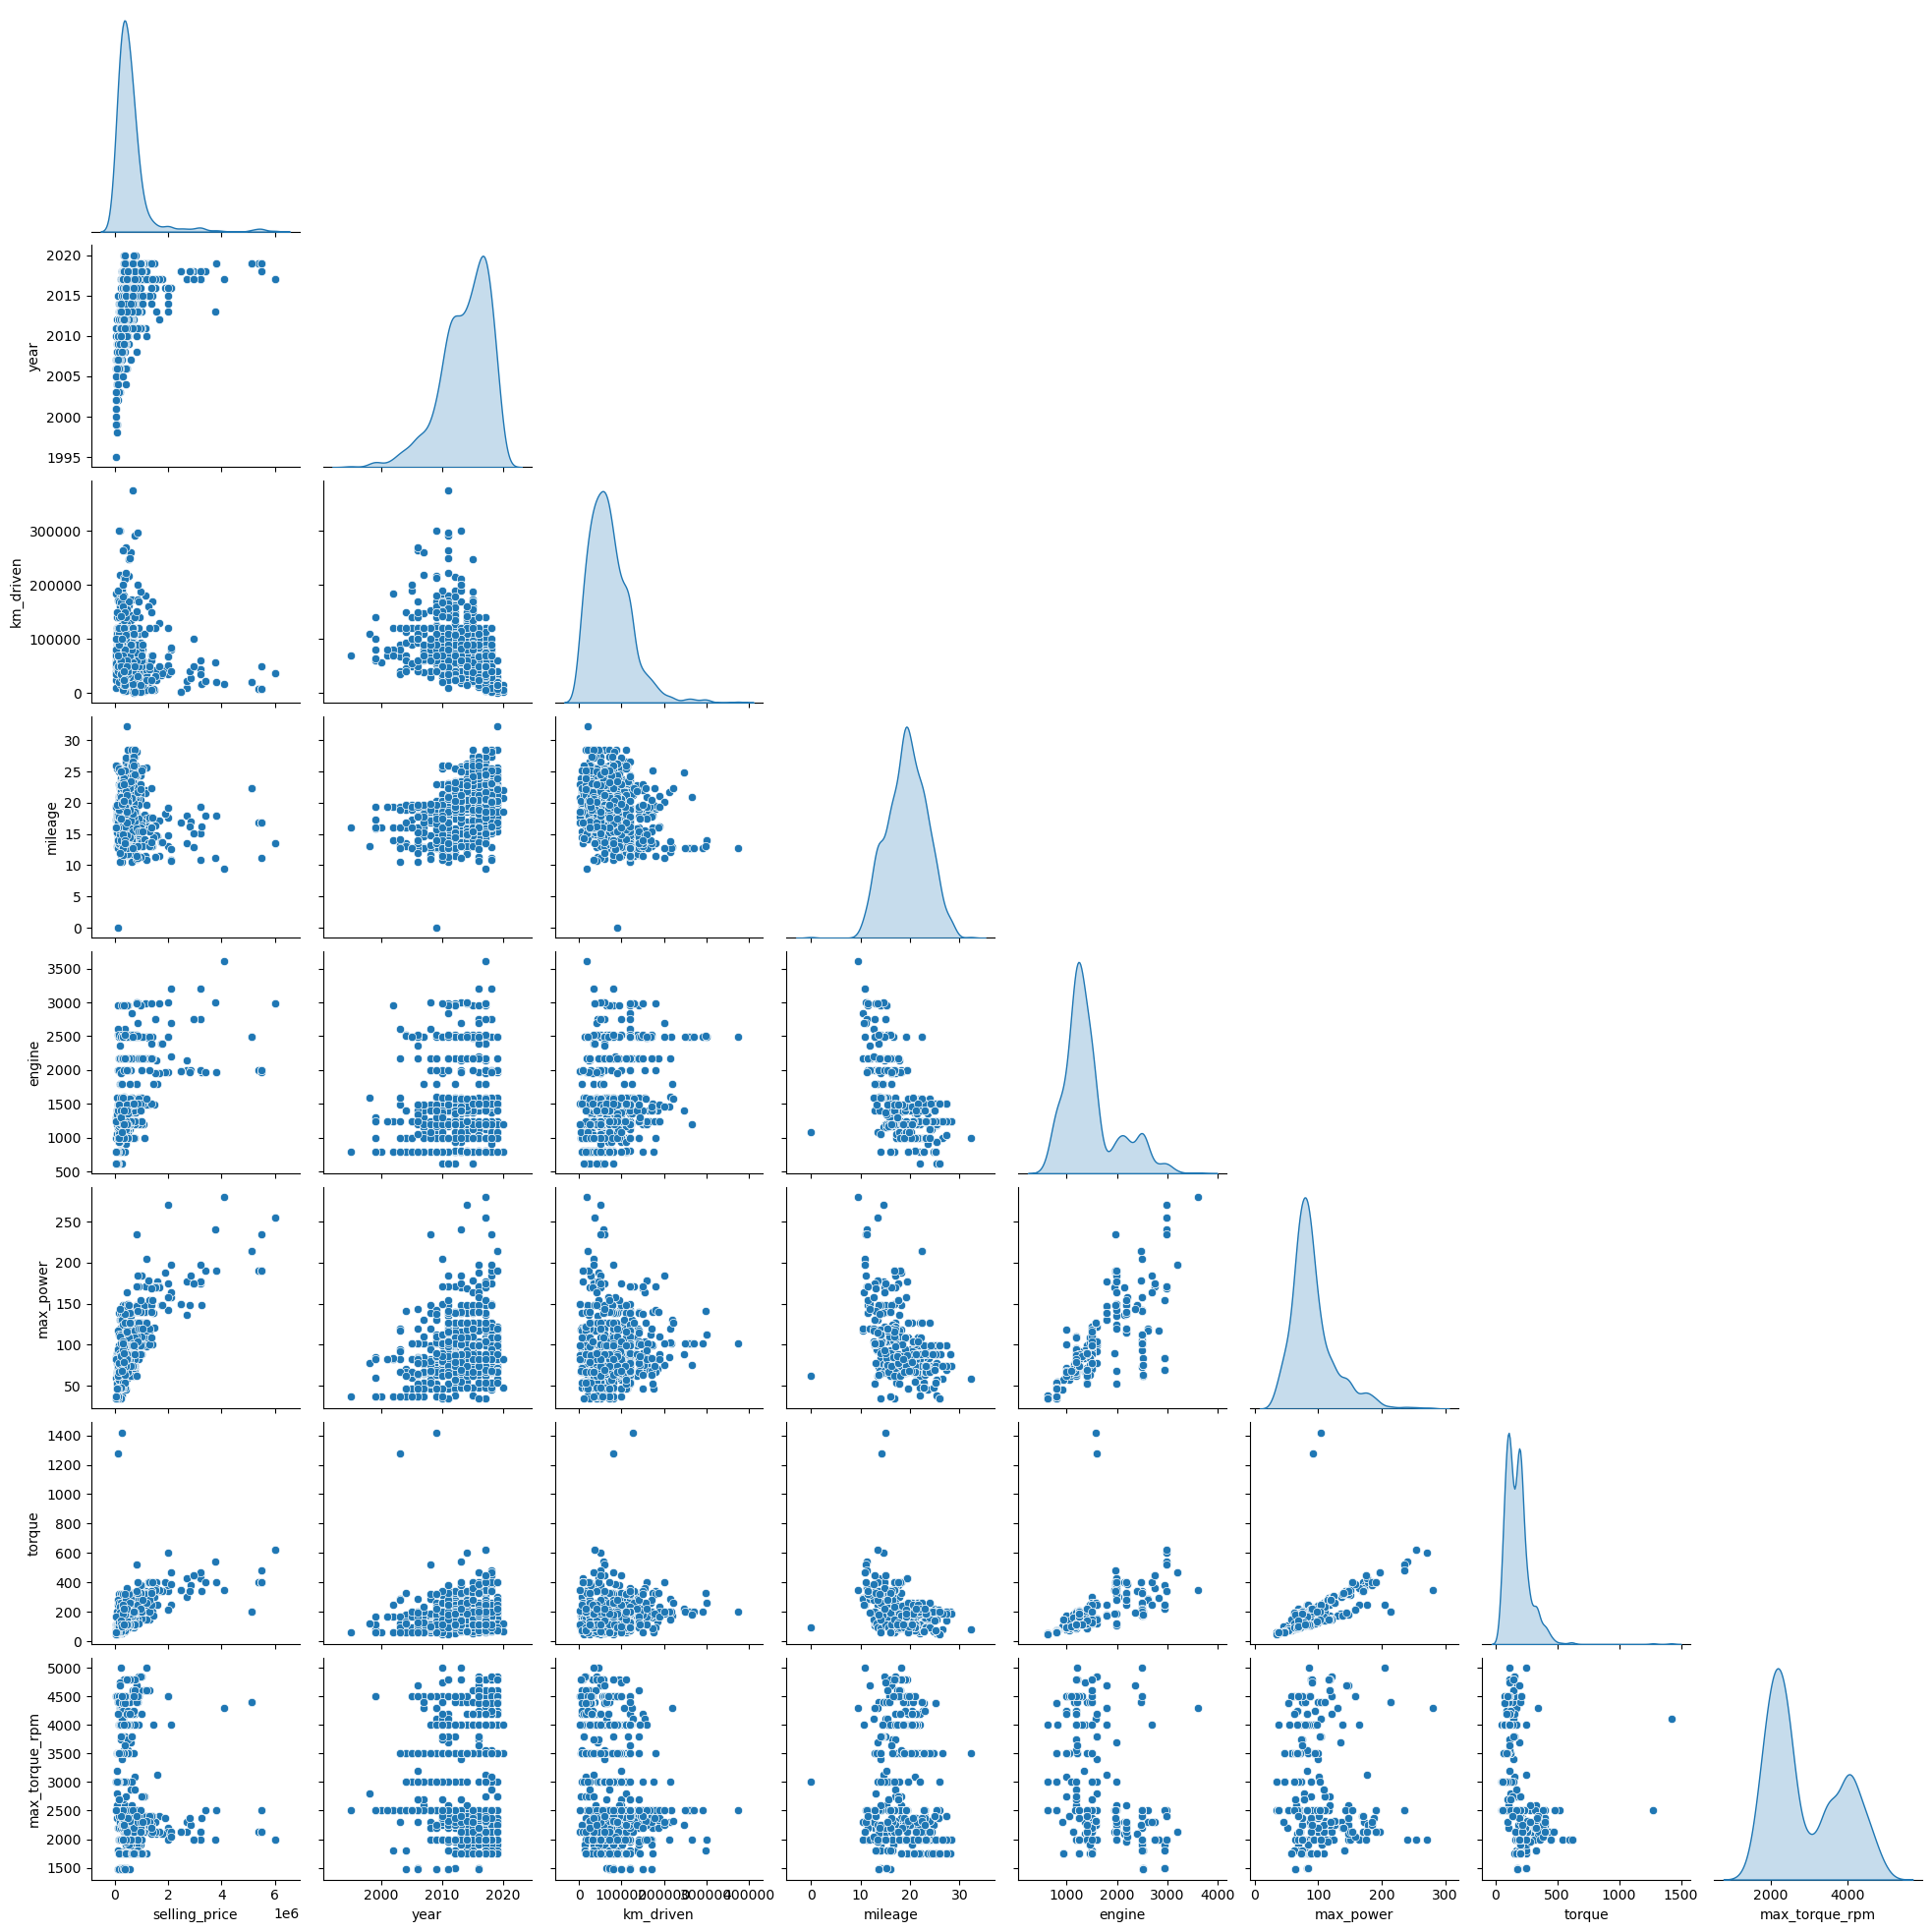

In [19]:
%matplotlib inline
sns.pairplot(df_test[numerical_cols],
             corner=True,
             diag_kind='kde',
             height=2.5
            )
plt.show()

#### Похожими ли оказались совокупности при разделении на трейн и тест?
Да, совокупности оказались похожими. Если обратить внимание на графики распределения, то они практически в точности
совпадают. Диаграммы рассеивания тоже очень сходи, проглядываются одни и те же тенденции. Единственным различием
является то, что для некоторых признаков в трейне присутствуют экстремальные значения из-за большего количества данных,
а в тесте их нет. 

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


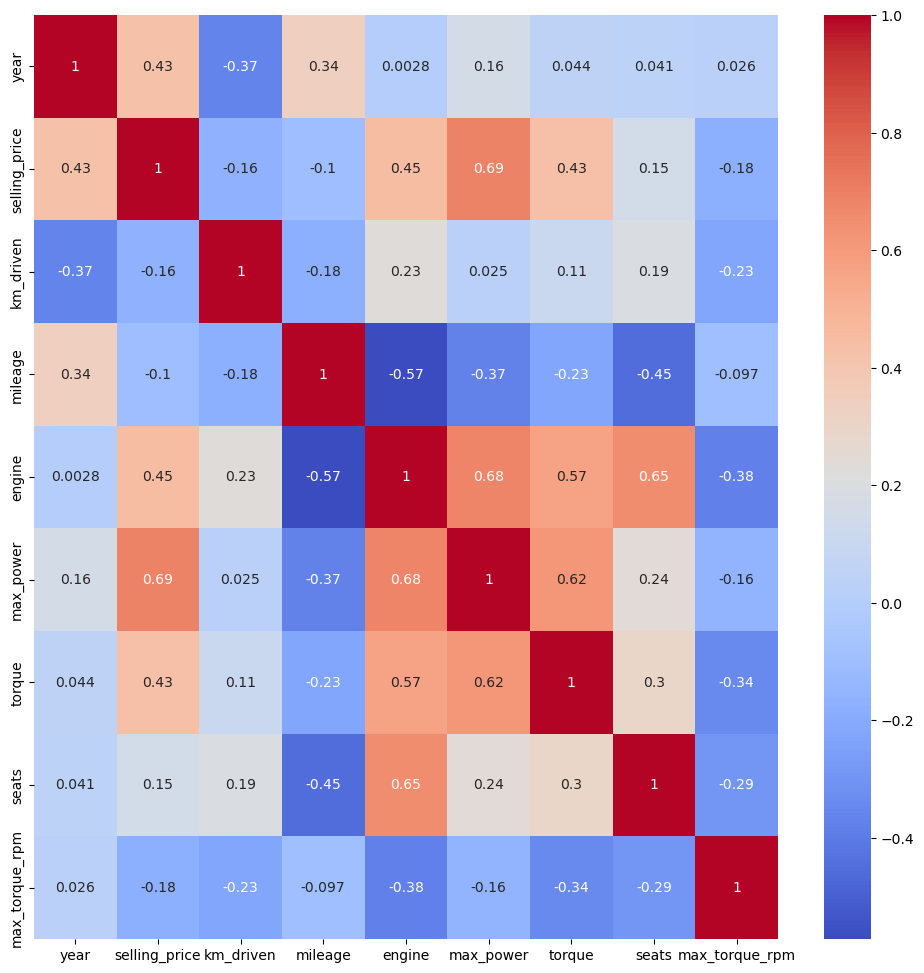

In [20]:
%matplotlib inline

train_corr = df_train.corr(numeric_only=True)

plt.figure(figsize=(12, 12))
sns.heatmap(train_corr,
            cmap='coolwarm',
            annot=True
           )
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

#### Какие 2 признака наименее скоррелированы между собой?
Наименее скоррелированы между собой признаки `year` и `engine`

#### Между какими признаками наблюдается довольно сильная положительная линейная зависимость?
Наиболее сильная положительная линейная зависимость наблюдается между признаками `selling_price` и `max_power`, `engine` и `max_power`,
`seats` и `engine`, `torque` с `max_power` и `engine`.

#### Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
Корреляция между этими признаками имеет значение `-0.37. Поэтому вполне разумно предполагать, что чем меньше год, тем, вероятно, больше километров
проехала машина к дате продажи. Старая машина имеет больший пробег, но не всегда.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

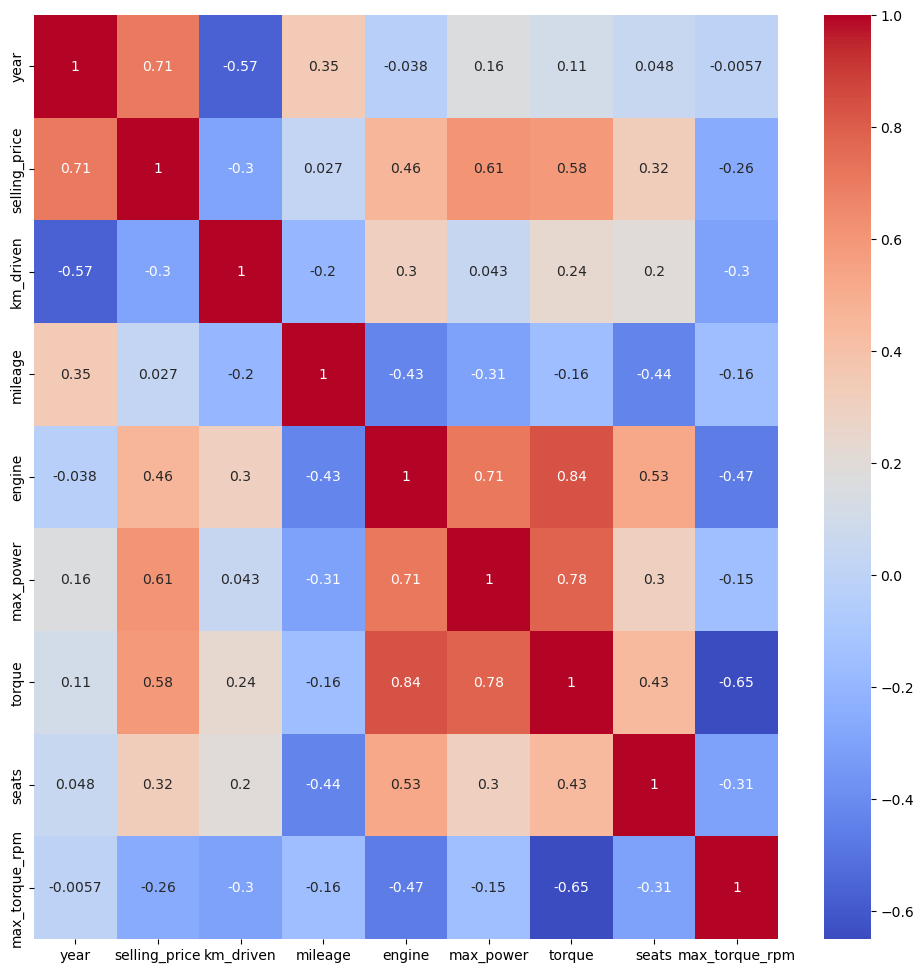

In [21]:
%matplotlib inline

spearman_corr = df_train.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr,
            cmap='coolwarm',
            annot=True
           )
plt.show()

#### Сравнение ручной реализации корреляции Спирмена с библиотечной
Результаты ручной реализации практически в точности совпадают с библиотечной.

#### Выводы по корреляциям Пирсона и Спирмена
Как можно заметить по тепловым картам, для многих признаков значения корреляций Пирсона и Спирмана сильно отличаются. Это связано с тем, что
корреляция Пирсона основана на линейности связи, а корреляция Спирмена не монотонности. Корреляция Спирмена замечает нелинейные связи
и устойчива к выбросам, так как опирается на ранги, а не на сами значения. Поэтому её построение вполне обоснованно.

interval columns not set, guessing: ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']


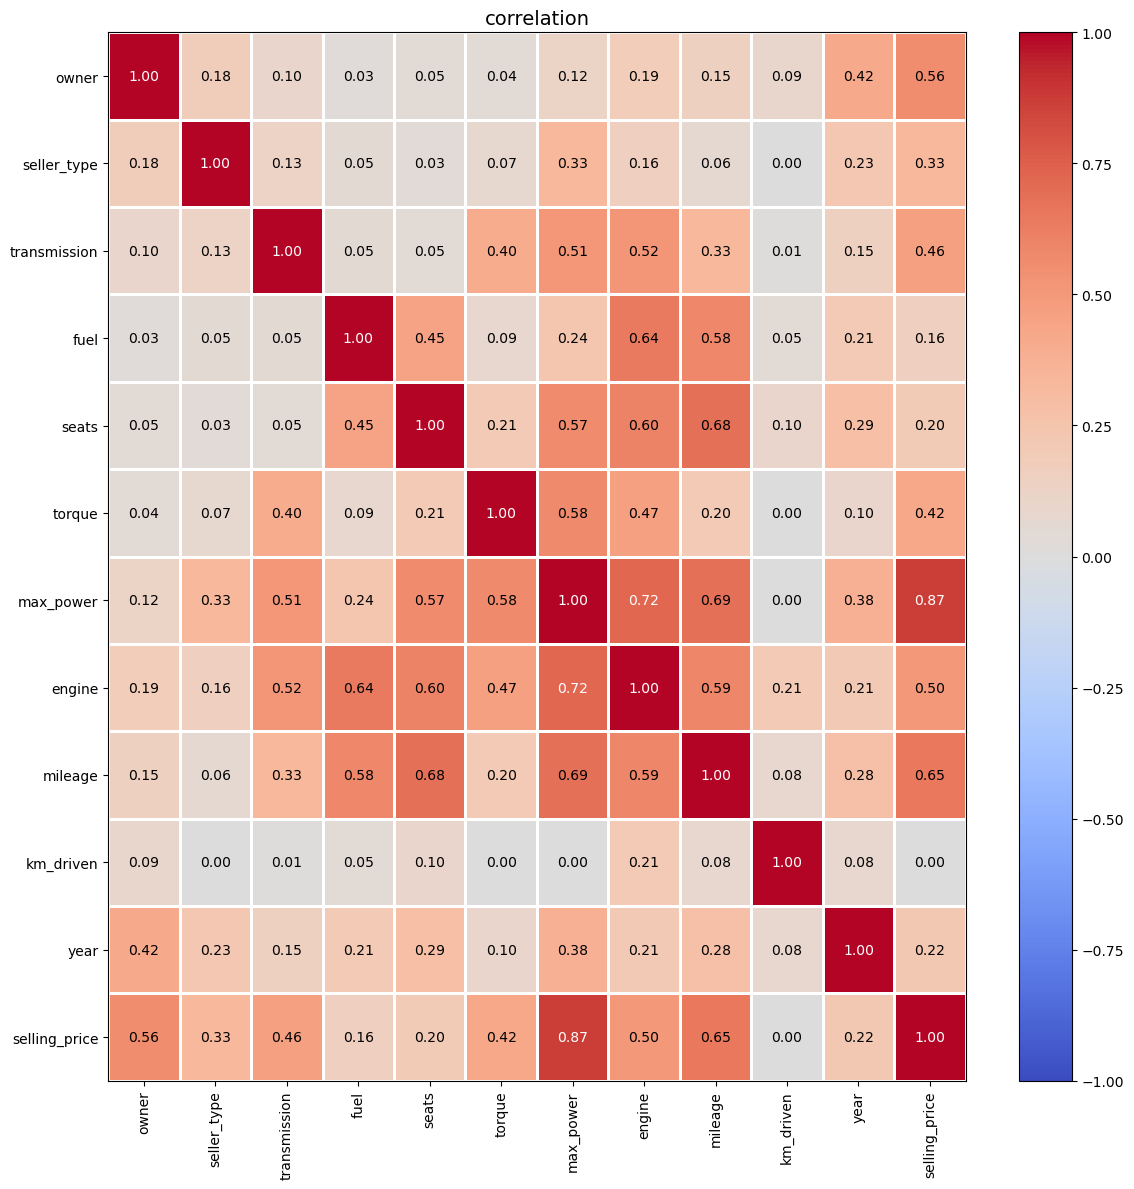

In [22]:
%matplotlib inline

import phik
from phik.report import plot_correlation_matrix

phik_cols = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'fuel', 'transmission', 'seller_type', 'owner']
phik_matrix = df_train[phik_cols].phik_matrix()
plot_correlation_matrix(phik_matrix[phik_cols].values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        color_map="coolwarm", 
                        figsize=(12, 12))
plt.show()

#### Интерпретация результатов
С помощью матрицы корреляций phik мы можем сравнить не только числовые признаки с числовыми, но еще и с категориальными. Также, матрица
корреляций phik достаточно хорошо улавливает нелинейные связи и устойчива к шуму в данных. Поэтому её построение тоже обоснованно.

Связь `selling_price` с `max_power` также остается самой сильной. Это вполне логично, так как даже старая мощная машина, как правило,
стоит больше, чем новая, но с низкой мощностью.

В отличии от корреляций Пирсона и Спирмена, phik показывает сильную связь между 'mileage' и 'selling_price', что тоже вполне
разумно, так как зачастую авто, потребляющие больше топлива, стоят дороже экономных вариантов.

Количество владельцев автомобиля `owner` достаточно сильно влияет на его стоимость `selling_price`. Связь этого признака с целевой переменной
даже сильнее, чем у объема двигателя `engine` и крутящим моментом `torque`, также имеющих сильную связь с таргетом.

Странным является то, что phik показал нулевую связь `km_driven` с `selling_price`, что явно является ошибкой. Также настораживает
низкая связь `year` с целевой переменной. Вероятно, зависимость внутри корзин оказалась излишне шумной и phik обнулил значимость. Поэтому,
не стоит полагаться только на матрицу корреляций phik, а анализировать и другие методы.


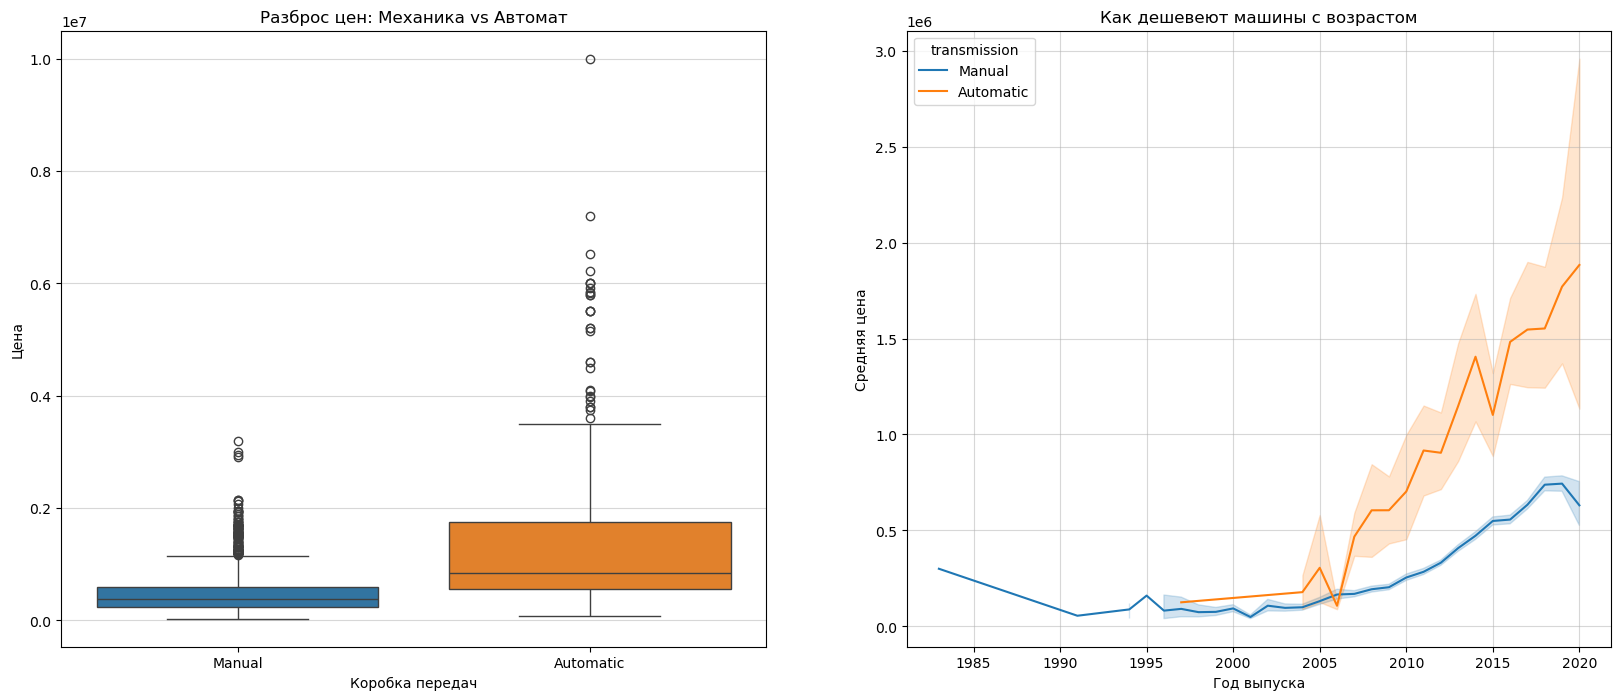

In [23]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=df_train, 
            x='transmission', 
            y='selling_price', 
            hue='transmission',
            legend=False,
            ax=axes[0])

axes[0].set_title('Разброс цен: Механика vs Автомат')
axes[0].set_xlabel('Коробка передач')
axes[0].set_ylabel('Цена')
axes[0].grid(axis='y', alpha=0.5)

sns.lineplot(data=df_train, 
             x='year', 
             y='selling_price', 
             hue='transmission', 
             ax=axes[1])

axes[1].set_title('Как дешевеют машины с возрастом')
axes[1].set_xlabel('Год выпуска')
axes[1].set_ylabel('Средняя цена')
axes[1].grid(alpha=0.5)

plt.show()

#### Обоснование выбора двух дополнительных графиков
Я решил построить два дополнительных графика (boxplot и lineplot), чтобы посмотреть влияние `transmission`, одного из
ключевых категориальных признаков, на цену в статике и динамике (во времени).

На левом графике можно заметить, что машины с автоматической коробкой передач имеют большую медиану цен. При этом у них заметен большой интерквартильный размах, что свидетельствует о наличии автоматической коробки передач как у бюджетных, так и у премиальных авто. Механикой преимущественно оснащены недорогие автомобили. Многие данные выбиваются из IQR, что говорит о шуме в данных.

На правом графике видно, что в данных приутствуют машины с автоматической коробкой передач, произведенные не ранее 1997 года, а с механической коробкой передач есть эксземпляры 1985 и более раннего года выпуска. Также, видно, что для старых автомобилей стоимость практически не зависит от типа  установленной коробки передач. А вот для новых автомобилей разница существенна. Таким образом, влияние типа коробки передач может быть
разным, в зависимости от года выпуска авто.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [24]:
R_cols = ['seats', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

y_train = df_train['selling_price'].copy()
X_train = df_train[R_cols].copy()

In [25]:
assert X_train.shape == (5840, 8)

In [26]:
y_test = df_test['selling_price'].copy()
X_test = df_test[R_cols].copy()

In [27]:
assert X_test.shape == (1000, 8)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

lr_train_MSE = MSE(y_train, lr_pred_train)
lr_test_MSE = MSE(y_test, lr_pred_test)
lr_train_r2 = r2_score(y_train, lr_pred_train)
lr_test_r2 = r2_score(y_test, lr_pred_test)

print(f'MSE для трейна: {lr_train_MSE:.2f}')
print(f'MSE для теста: {lr_test_MSE:.2f}')
print(f'RMSE для трейна: {(lr_train_MSE ** 0.5):.2f}')
print(f'RMSE для теста: {(lr_test_MSE ** 0.5):.2f}')
print(f'R2_score для трейна: {lr_train_r2:.2f}')
print(f'R2_score для теста: {lr_test_r2:.2f}')

MSE для трейна: 114329486968.89
MSE для теста: 230353087483.29
RMSE для трейна: 338126.44
RMSE для теста: 479951.13
R2_score для трейна: 0.60
R2_score для теста: 0.60


#### Выводы по значениям метрик качества
R2_score для трейна и для теста совпали, это говорит о том, что переобучение отсутствует. Результат в 0.6 не является хорошим,
но это было вполне ожидаемо в связи с тем, что мы удалили все категориальные признаки из данных. В целом, для бейзлайна это неплохой
результат, модель выучила общие закономерности.

MSE для трейна и для теста сильно отличается. Это может быть связано с тем, что в тестовой выборке присутствуют выбросы, к которым
MSE очень чувствителен. По RMSE отлично видно, что модель в текущем виде пока что не готова к использованию, так как ошибка почти в полмиллиона
рублей очень критична.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [30]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

pd.DataFrame(data=lr_scaled.coef_, index=X_train_scaled.columns, columns=['weights'])


weights
seats           -31824.863704
year            164964.311649
km_driven       -49702.216997
mileage          -8622.300779
engine           18290.347071
max_power       325887.638597
torque            4575.363180
max_torque_rpm  -62176.731797

#### Какой признак оказался наиболее информативным в предсказании цены?
Наиболее информативным оказался признак `max_power`. При увеличении мощности на 1 стандартное отклонение, цена автомобиля
вырастет более, чем на 325000 единиц. Это подтверждает увиденное на этапе анализа матриц корреляций.

Стоит отметить, что момент`torque` в действительности тесно связан с мощностью `max_power` и, по идее, должен иметь большой вес,
но мы видим значение всего чуть больше 4500. Это является следствием мультиколлинеарости, когда `max_power` забрал весь вклад тесно связанных
с ним признаков себе.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [31]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso()
lr_lasso.fit(X_train_scaled, y_train)

lr_lasso_pred_train = lr_lasso.predict(X_train_scaled)
lr_lasso_pred_test = lr_lasso.predict(X_test_scaled)

lr_lasso_train_MSE = MSE(y_train, lr_lasso_pred_train)
lr_lasso_test_MSE = MSE(y_test, lr_lasso_pred_test)
lr_lasso_train_r2 = r2_score(y_train, lr_lasso_pred_train)
lr_lasso_test_r2 = r2_score(y_test, lr_lasso_pred_test)

print(f'MSE для трейна: {lr_lasso_train_MSE:.2f}')
print(f'MSE для теста: {lr_lasso_test_MSE:.2f}')
print(f'RMSE для трейна: {(lr_lasso_train_MSE ** 0.5):.2f}')
print(f'RMSE для теста: {(lr_lasso_test_MSE ** 0.5):.2f}')
print(f'R2_score для трейна: {lr_lasso_train_r2:.2f}')
print(f'R2_score для теста: {lr_lasso_test_r2:.2f}')

pd.DataFrame(data=lr_lasso.coef_, index=X_train_scaled.columns, columns=['weight'])

MSE для трейна: 114329486982.46
MSE для теста: 230353816373.42
RMSE для трейна: 338126.44
RMSE для теста: 479951.89
R2_score для трейна: 0.60
R2_score для теста: 0.60


weight
seats           -31820.790229
year            164962.118696
km_driven       -49701.260731
mileage          -8619.034214
engine           18288.401351
max_power       325889.233194
torque            4574.702037
max_torque_rpm  -62174.669157

#### Оценка качества Lasso регрессии
Сравнивая результаты Lasso регрессии с результатами, полученными ранее, нетрудно сделать вывод о том, что они практически
идентичны. L1-регуляризация не занулила ни одного веса. Это связано с тем, что в функции потерь Lasso регрессии
значение MSE несоизмеримо больше значений штрафа (второго слагаемого), так как по умолчанию гиперпараметр alpha равен 1.
Для того, чтобы получить качественные результаты, надо грамотно подобрать гиперпараметр.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [32]:
from sklearn.model_selection import GridSearchCV


lassoCV = GridSearchCV(
    estimator=Lasso(random_state=42, max_iter=5000),
    param_grid={'alpha': np.logspace(1, 5, 20)},
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

lassoCV.fit(X_train_scaled, y_train)

best_lasso = lassoCV.best_estimator_
best_alpha = lassoCV.best_params_['alpha']

print(f'\nЛучший alpha: {best_alpha:.2f}')

n_models = len(np.logspace(1, 5, 20)) * 10
print(f'Всего обучено {n_models} моделей')

print('Веса лучшей модели:')
best_lasso_weights = pd.DataFrame(data=best_lasso.coef_, index=X_train_scaled.columns, columns=['weight'])
display(best_lasso_weights)

zer_f = best_lasso_weights[best_lasso_weights['weight'] == 0].index.tolist()
print(f"Зануленные признаки: {zer_f}\n")


y_pred_best_train = best_lasso.predict(X_train_scaled)
y_pred_best_test = best_lasso.predict(X_test_scaled)

lr_lassoCV_train_MSE = MSE(y_train, y_pred_best_train)
lr_lassoCV_test_MSE = MSE(y_test, y_pred_best_test)
lr_lassoCV_train_r2 = r2_score(y_train, y_pred_best_train)
lr_lassoCV_test_r2 = r2_score(y_test, y_pred_best_test)

print(f'MSE для трейна: {lr_lassoCV_train_MSE:.2f}')
print(f'MSE для теста: {lr_lassoCV_test_MSE:.2f}')
print(f'RMSE для трейна: {(lr_lassoCV_train_MSE ** 0.5):.2f}')
print(f'RMSE для теста: {(lr_lassoCV_test_MSE ** 0.5):.2f}')
print(f'R2_score для трейна: {lr_lassoCV_train_r2:.2f}')
print(f'R2_score для теста: {lr_lassoCV_test_r2:.2f}')

Fitting 10 folds for each of 20 candidates, totalling 200 fits

Лучший alpha: 8858.67
Всего обучено 200 моделей
Веса лучшей модели:


weight
seats            -4994.771392
year            154148.421256
km_driven       -41096.863344
mileage              0.000000
engine               0.000000
max_power       332362.637121
torque               0.000000
max_torque_rpm  -49910.996145

Зануленные признаки: ['mileage', 'engine', 'torque']

MSE для трейна: 114944027033.92
MSE для теста: 237106135370.33
RMSE для трейна: 339033.96
RMSE для теста: 486935.45
R2_score для трейна: 0.60
R2_score для теста: 0.59


`Lasso` занулила веса `mileage`, `engine`, `torque`, что подтверждает сделанные ранее выводы о мультиколлинеарности с `max_power`.

Также можно заметить, что немного упала метрика `R2`. Это связано с тем, что, занулив веса, мы добавили смещение.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [33]:
from sklearn.linear_model import ElasticNet
elasticCV = GridSearchCV(
    estimator=ElasticNet(random_state=42, max_iter=5000),
    param_grid={'alpha': np.logspace(1, 5, 20), 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]},
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

elasticCV.fit(X_train_scaled, y_train)

best_elastic = elasticCV.best_estimator_
best_params = elasticCV.best_params_
print(f'\nЛучшие параметры: {best_params}')

n_elastic_models = 20 * 7 * 10
print(f'Всего обучено {n_elastic_models} моделей')

Fitting 10 folds for each of 140 candidates, totalling 1400 fits

Лучшие параметры: {'alpha': np.float64(8858.667904100823), 'l1_ratio': 1.0}
Всего обучено 1400 моделей


Коэффициент `l1_ratio` равен 1, что говорит о том, что `ElasticNet` регуляризация полностью превратилась в `Lasso`. Это подтверждается
тем фактом, что коэффициент `alpha` равен тому же самому значению. Таким образом, усложнение модели не дало прироста качества.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [34]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()
#X_train_cat = X_train_cat.drop('name', axis=1)
#X_test_cat = X_test_cat.drop('name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [35]:
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.split()[0])
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x.split()[0])
print(f'Все уникальные названия автомобилей в тренировочных данных: {X_train_cat['name'].unique().tolist()}')
print(f']nВсе уникальные названия автомобилей в тестовых данных: {X_test_cat['name'].unique().tolist()}')

Все уникальные названия автомобилей в тренировочных данных: ['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault', 'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot']
]nВсе уникальные названия автомобилей в тестовых данных: ['Mahindra', 'Tata', 'Honda', 'Chevrolet', 'Maruti', 'Hyundai', 'Lexus', 'Ford', 'Jeep', 'Renault', 'Toyota', 'Skoda', 'BMW', 'Datsun', 'Volvo', 'Nissan', 'Volkswagen', 'Ambassador', 'Jaguar', 'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Opel', 'Fiat', 'Ashok']


В тесте присутствуют даныые, которых нет в трейне, а именно 'Opel'. Стоит учитывать это при кодировании, иначе модель поломается.

In [36]:
print('Статистики по категориальным столбцам для тренировочных данных')
display(X_train_cat.describe(include='object'))
print('\nСтатистики по категориальным столбцам для тестовых данных')
display(X_test_cat.describe(include='object'))

Статистики по категориальным столбцам для тренировочных данных


name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603


Статистики по категориальным столбцам для тестовых данных


name    fuel seller_type transmission        owner
count     1000    1000        1000         1000         1000
unique      25       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq       290     534         837          877          623

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [37]:
from sklearn.preprocessing import OneHotEncoder


X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x if x in set(X_train_cat['name'].unique()) else X_train_cat['name'].mode()[0])

cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

# Как было замечено ранее, в тренировочных данных могут быть марки машин, не встречающиеся
# в тесте, поэтому для того, чтобы модель работала, игнорируем такие данные
OHE = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_OHE = OHE.fit_transform(X_train_cat[cat_features])
X_test_OHE = OHE.transform(X_test_cat[cat_features])

OHE_cols = OHE.get_feature_names_out(cat_features)
X_train_OHE = pd.DataFrame(X_train_OHE, columns=OHE_cols, index=X_train_cat.index)
X_test_OHE = pd.DataFrame(X_test_OHE, columns=OHE_cols, index=X_test_cat.index)

display(X_train_OHE)
display(X_test_OHE)

name_Audi  name_BMW  name_Chevrolet  name_Daewoo  name_Datsun  \
0           0.0       0.0             0.0          0.0          0.0   
1           0.0       0.0             0.0          0.0          0.0   
2           0.0       0.0             0.0          0.0          0.0   
3           0.0       0.0             0.0          0.0          0.0   
4           0.0       0.0             0.0          0.0          0.0   
...         ...       ...             ...          ...          ...   
5835        0.0       0.0             0.0          0.0          0.0   
5836        0.0       0.0             0.0          0.0          0.0   
5837        0.0       0.0             0.0          0.0          0.0   
5838        0.0       0.0             0.0          0.0          0.0   
5839        0.0       0.0             0.0          0.0          0.0   

      name_Fiat  name_Force  name_Ford  name_Honda  name_Hyundai  ...  \
0           0.0         0.0        0.0         0.0           0.0  ...   
1           0.0         0.0        0.0         0.0           0.0  ...   
2           0.0         0.0        0.0         0.0           1.0  ...   
3           0.0         0.0        0.0         0.0           0.0  ...   
4           0.0         0.0        0.0         0.0           1.0  ...   
...         ...         ...        ...         ...           ...  ...   
5835        0.0         0.0        0.0         0.0           1.0  ...   
5836        0.0         0.0        0.0         0.0           0.0  ...   
5837        0.0         0.0        0.0         0.0           1.0  ...   
5838        0.0         0.0        0.0         0.0           1.0  ...   
5839        0.0         0.0        0.0         0.0           0.0  ...   

      owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                      0.0                0.0      0.0      1.0      0.0   
1                      0.0                0.0      0.0      1.0      0.0   
2                      0.0                0.0      0.0      1.0      0.0   
3                      0.0                0.0      0.0      1.0      0.0   
4                      0.0                0.0      0.0      1.0      0.0   
...                    ...                ...      ...      ...      ...   
5835                   0.0                0.0      0.0      1.0      0.0   
5836                   0.0                0.0      0.0      1.0      0.0   
5837                   0.0                0.0      0.0      1.0      0.0   
5838                   0.0                0.0      0.0      1.0      0.0   
5839                   0.0                0.0      0.0      1.0      0.0   

      seats_7  seats_8  seats_9  seats_10  seats_14  
0         0.0      0.0      0.0       0.0       0.0  
1         0.0      0.0      0.0       0.0       0.0  
2         0.0      0.0      0.0       0.0       0.0  
3         0.0      0.0      0.0       0.0       0.0  
4         0.0      0.0      0.0       0.0       0.0  
...       ...      ...      ...       ...       ...  
5835      0.0      0.0      0.0       0.0       0.0  
5836      0.0      0.0      0.0       0.0       0.0  
5837      0.0      0.0      0.0       0.0       0.0  
5838      0.0      0.0      0.0       0.0       0.0  
5839      0.0      0.0      0.0       0.0       0.0  

[5840 rows x 47 columns]

name_Audi  name_BMW  name_Chevrolet  name_Daewoo  name_Datsun  name_Fiat  \
0          0.0       0.0             0.0          0.0          0.0        0.0   
1          0.0       0.0             0.0          0.0          0.0        0.0   
2          0.0       0.0             0.0          0.0          0.0        0.0   
3          0.0       0.0             0.0          0.0          0.0        0.0   
4          0.0       0.0             0.0          0.0          0.0        0.0   
..         ...       ...             ...          ...          ...        ...   
995        0.0       0.0             0.0          0.0          0.0        0.0   
996        0.0       0.0             0.0          0.0          0.0        0.0   
997        0.0       0.0             0.0          0.0          0.0        0.0   
998        0.0       0.0             0.0          0.0          0.0        0.0   
999        0.0       0.0             0.0          0.0          0.0        0.0   

     name_Force  name_Ford  name_Honda  name_Hyundai  ...  \
0           0.0        0.0         0.0           0.0  ...   
1           0.0        0.0         0.0           0.0  ...   
2           0.0        0.0         1.0           0.0  ...   
3           0.0        0.0         1.0           0.0  ...   
4           0.0        0.0         0.0           0.0  ...   
..          ...        ...         ...           ...  ...   
995         0.0        0.0         0.0           1.0  ...   
996         0.0        0.0         0.0           1.0  ...   
997         0.0        0.0         0.0           1.0  ...   
998         0.0        0.0         0.0           1.0  ...   
999         0.0        0.0         1.0           0.0  ...   

     owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                     0.0                0.0      0.0      0.0      0.0   
1                     0.0                0.0      0.0      1.0      0.0   
2                     0.0                0.0      0.0      1.0      0.0   
3                     0.0                0.0      0.0      1.0      0.0   
4                     0.0                0.0      0.0      1.0      0.0   
..                    ...                ...      ...      ...      ...   
995                   0.0                0.0      0.0      1.0      0.0   
996                   0.0                0.0      0.0      1.0      0.0   
997                   0.0                0.0      0.0      1.0      0.0   
998                   0.0                0.0      0.0      1.0      0.0   
999                   0.0                0.0      0.0      1.0      0.0   

     seats_7  seats_8  seats_9  seats_10  seats_14  
0        1.0      0.0      0.0       0.0       0.0  
1        0.0      0.0      0.0       0.0       0.0  
2        0.0      0.0      0.0       0.0       0.0  
3        0.0      0.0      0.0       0.0       0.0  
4        0.0      0.0      0.0       0.0       0.0  
..       ...      ...      ...       ...       ...  
995      0.0      0.0      0.0       0.0       0.0  
996      0.0      0.0      0.0       0.0       0.0  
997      0.0      0.0      0.0       0.0       0.0  
998      0.0      0.0      0.0       0.0       0.0  
999      0.0      0.0      0.0       0.0       0.0  

[1000 rows x 47 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Удаляем признак seats из вещественных, т.к. добавили его в категориальные
X_train_scaled = X_train_scaled.drop('seats', axis=1)
X_test_scaled = X_test_scaled.drop('seats', axis=1)
X_train_final = pd.concat([X_train_scaled, X_train_OHE], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_OHE], axis=1)

RidgeCV = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid={'alpha': np.logspace(0, 10, 50)},
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

RidgeCV.fit(X_train_final, y_train)

best_ridge = RidgeCV.best_estimator_
print(f'\nЛучший alpha: {RidgeCV.best_params_['alpha']:.2f}')

ridge_pred_best_train = best_ridge.predict(X_train_final)
ridge_pred_best_test = best_ridge.predict(X_test_final)

lr_RidgeCV_train_MSE = MSE(y_train, ridge_pred_best_train)
lr_RidgeCV_test_MSE = MSE(y_test, ridge_pred_best_test)
lr_RidgeCV_train_r2 = r2_score(y_train, ridge_pred_best_train)
lr_RidgeCV_test_r2 = r2_score(y_test, ridge_pred_best_test)

print(f'\nMSE для трейна: {lr_RidgeCV_train_MSE:.2f}')
print(f'MSE для теста: {lr_RidgeCV_test_MSE:.2f}')
print(f'RMSE для трейна: {(lr_RidgeCV_train_MSE ** 0.5):.2f}')
print(f'RMSE для теста: {(lr_RidgeCV_test_MSE ** 0.5):.2f}')
print(f'R2_score для трейна: {lr_RidgeCV_train_r2:.2f}')
print(f'R2_score для теста: {lr_RidgeCV_test_r2:.2f}')

Fitting 10 folds for each of 50 candidates, totalling 500 fits

Лучший alpha: 1.60

MSE для трейна: 66116444737.38
MSE для теста: 127520850873.47
RMSE для трейна: 257131.18
RMSE для теста: 357100.62
R2_score для трейна: 0.77
R2_score для теста: 0.78


#### Выводы по Ridge регуляризации
Качество модели после добавления категориальных признаков сильно возросло. Значение R2 получило скачок с 0.60 до 0.78, что указывает
на крайнюю важность добавления категориальных признаков в обучающую выборку. Модель всё ещё остается далёкой от идеальной, упираясь в 
возможности линейных алгоритмов, но уже показывает гораздо лучшие результаты, чем прежде.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [39]:
def business_metric(y_true, y_pred):
    diff = np.abs(y_true - y_pred)
    perc = y_true * 0.1
    score = np.mean(diff <= perc)

    return score 
    
print(f'Бизнес метрика для классической линейной регрессии с дефолтными параметрами на вещественных признаках: {business_metric(y_test, lr_pred_test)}')
print(f'Бизнес метрика для линейной регрессии с Lasso регуляризацией на вещественных признаках: {business_metric(y_test, lr_lasso_pred_test)}')
print(f'Бизнес метрика для линейной регрессии с Ridge регуляризацией на всем датасете: {business_metric(y_test, ridge_pred_best_test)}')

Бизнес метрика для классической линейной регрессии с дефолтными параметрами на вещественных признаках: 0.241
Бизнес метрика для линейной регрессии с Lasso регуляризацией на вещественных признаках: 0.241
Бизнес метрика для линейной регрессии с Ridge регуляризацией на всем датасете: 0.296


#### Выводы по бизнес метрике
Полученное значение бизнес метрики сильно отличается от значения R2 метрики. Если ridge модель по R2 объясняла 78% вариации данных, то по бизнес метрике она угадывает менее, чем одну из трех машин. Это может объясняться тем, что R2 будет высоким даже если мы ошибаешься на 10-15%, но в обе стороны. Бизнес метрика же более сурова и отсекает все варианты, ошибающиеся более, чем на 10%.

Самой успешной оказалась линейная модель с Ridge регуляризацией, обученная на вещественных и категориальных признаках.

# **Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [44]:
import pickle

bundle = {
    "model": best_ridge,
    "scaler": scaler,
    "model_columns": X_train_final.columns.tolist(),
    "num_features": num_features,
    "cat_features": cat_features,
    "medians": X_train[num_features].median()
}

with open('model.pkl', 'wb') as file:
    pickle.dump(bundle, file)